# **Projeto de Disciplina - Validação de modelos de clusterização [22E4_3]**
Nathalia de Almeida Castelo Branco

## **Etapa 01 - Infraestrutura**

In [1]:
# Importação das dependências

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
# Determinação de estilos

sns.set(style='whitegrid')
sns.set_palette(['#7DBA91', '#59A590', '#40908E', '#287A8C', '#1C6488'])
sch.set_link_color_palette(['#7DBA91', '#59A590', '#40908E', '#287A8C', '#1C6488'])

## **Etapa 02 - Escolha da base de dados**

1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

**Dicionário de Dados**

| **FEATURES - CLIENTES** | DESCRIÇÃO |
|---|---|
| ID              | Identificador único do cliente |
| Year_Birth      | Ano de aniversário do cliente |
| Education       | Nível de educação do cliente |
| Marital_Status  | Estado civil do cliente |
| Income          | Renda anual do cliente  |
| Kidhome         | Número de crianças na casa do cliente  |
| Teenhome        | Número de adolescentes   |
| Dt_Customer     | Data em que se tornou cliente  |
| Recency         | Número de dias desde a última compra |
| Complain        | Reclamação: se reclamou nos últimos dois anos, 1. Caso contrário, 0.  |



| **FEATURES - PRODUTOS** | DESCRIÇÃO |
|---|---|
| MntWines        | Total gasto em vinho, últimos dois anos |
| MntFruits        | Total gasto em frutas, últimos dois anos |
| MntMeatProducts        | Total gasto em carnes, últimos dois anos |
| MntFishProducts        | Total gasto em peixes, últimos dois anos |
| MntSweetProducts        | Total gasto em doces, últimos dois anos |
| MntGoldProds        | Total gasto em produtos premium, últimos dois anos |

| **FEATURES - OFERTAS** | DESCRIÇÃO |
|---|---|
| NumDealsPurchases        | Número de pedidos feitos com desconto |
| AcceptedCmp1        | Aceite de oferta: se o cliente aceitou a oferta na primeira campanha, 1. Caso contrário, 0. |
| AcceptedCmp2        | Aceite de oferta: se o cliente aceitou a oferta na segunda campanha, 1. Caso contrário, 0. |
| AcceptedCmp3        | Aceite de oferta: se o cliente aceitou a oferta na terceira campanha, 1. Caso contrário, 0. |
| AcceptedCmp4        | Aceite de oferta: se o cliente aceitou a oferta na quarta campanha, 1. Caso contrário, 0. |
| AcceptedCmp5        | Aceite de oferta: se o cliente aceitou a oferta na quinta campanha, 1. Caso contrário, 0. |
| Response            | Aceite de oferta: se o cliente aceitou a oferta na última campanha, 1. Caso contrário, 0. |


| **FEATURES - LOCAL DA COMPRA** | DESCRIÇÃO |
|---|---|
| NumWebPurchases        | Número de compras feitas pelo website |
| NumCatalogPurchases        | Número de compras feitas usando um catálogo |
| NumStorePurchases        | Número de compras feitas presencialmente na loja |
| NumWebVisitsMonth        | Número de visitas ao website da empresa no último mês |


**As colunas Z_CostContact e Z_Revenue não aparentam possuir significado, serão excluídas do estudo**

In [3]:
data = pd.read_csv('data\marketing_campaign.csv', sep=",")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print(data.isnull().sum())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Nota-se que a feature da renda do cliente possui 24 valores nulos. Estes valores serão removidos.

2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

        Esta base de dados foi escolhida com o objetivo de praticar a segmentação de clientes, visto que no momento trabalho na interface entre tecnologia e marketing. A motivação para escolha se baseia em treinar a metodologia de análise de segmentos de clientes e aplicar em um case na empresa em que trabalho. 

## 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?


### Demonstração da faixa dinâmica das variáveis

In [6]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Renda familiar anual

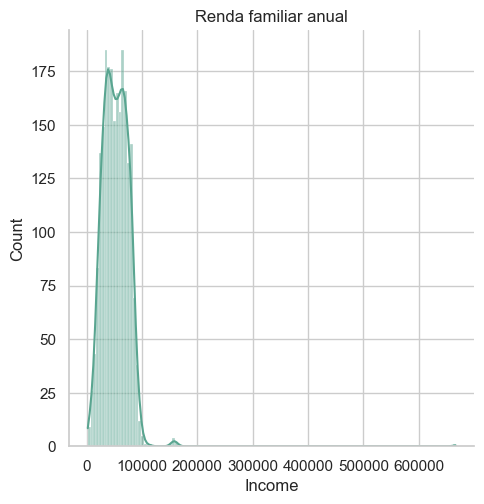

In [7]:
sns.displot(data=data, x = 'Income', color='#59A590', kde=True).set(title=f'Renda familiar anual');

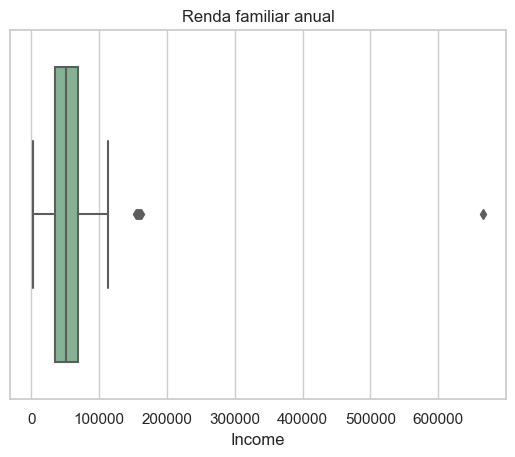

In [8]:
sns.boxplot(x=data['Income']).set(title=f'Renda familiar anual');

Para feature **Income**, os pontos próximos de 200 mil são aceitáveis. Já o ponto acima de 600 mil pode ser considerado um outlier.

### Ano de nascimento

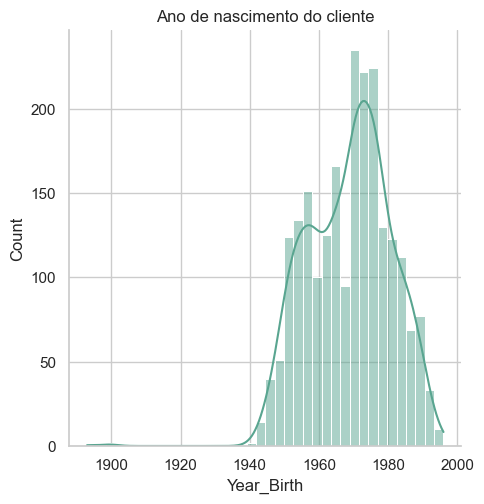

In [9]:
sns.displot(data=data, x = 'Year_Birth', color='#59A590', kde=True).set(title=f'Ano de nascimento do cliente');

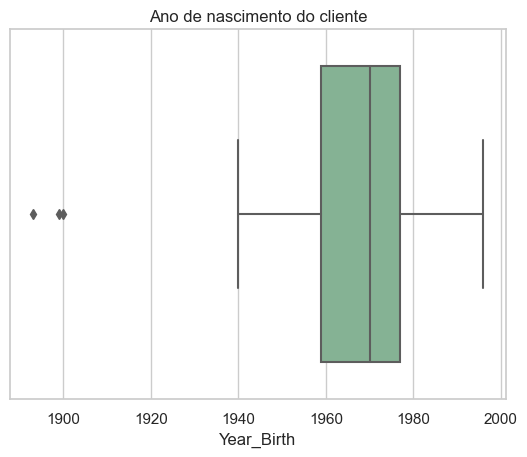

In [10]:
sns.boxplot(x=data['Year_Birth']).set(title=f'Ano de nascimento do cliente');

Para a feature **Year_Birth**, os anos antecedentes a 1940 podem ser considerados outliers, visto que, a partir de 1940, os clientes já possuem atualmente 83 anos. 

## 4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

    1. Inicialmente são observadas as features através das suas estatísticas
    2. Os valores nulos são removidos
    3. É realizada uma breve feature engineering para obtenção da idade do cliente e do número de filhos
    4. Após isso, são removidas as features desnecessárias
    

### Exploração dos dados

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### Remoção de nulos

In [12]:
data = data.dropna()
print(f'O novo número total de clientes únicos observados é de {data.shape[0]} clientes.')

O novo número total de clientes únicos observados é de 2216 clientes.


### Feature Engineering

In [13]:
# Criação da variável idade
date = datetime.date.today()
data['Age'] = date.year - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42


In [14]:
# Identificar a distribuição do grau de escolaridade
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [15]:
# Identificar a distribuição do estado civil
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
# Condensar o número de filhos em uma variável
data['Children'] = data['Kidhome'] + data['Teenhome']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,66,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,69,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,58,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,39,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,42,1


### Remoção de outliers

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


Na descrição estatística dos dados, é possível notar alguns outliers:
- O cliente de maior idade possui 130 anos
- O cliente de maior renda possui a renda muito superior ao quartil 75

Além disso, deve-se remover as features: Z_CostContact e Z_Revenue


In [18]:
# Remoção dos Outliers na Feature "Age" e "Income"
data = data[(data['Age'] < 90)]
data = data[(data['Income'] < 600000)]
print(f'O novo número total de clientes únicos observados é de {data.shape[0]} clientes.')

O novo número total de clientes únicos observados é de 2212 clientes.


### Remoção de features

In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Children'],
      dtype='object')

In [20]:
# Remoção das features desnecessárias
data = data.drop(['Kidhome', 'Teenhome', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'ID'], axis=1)

### Normalização dos dados

In [21]:
# 01 - Normalização dos dados
normalized_data = (economic_indicators - economic_indicators.mean()) / economic_indicators.std()
normalized_data.head()

NameError: name 'economic_indicators' is not defined

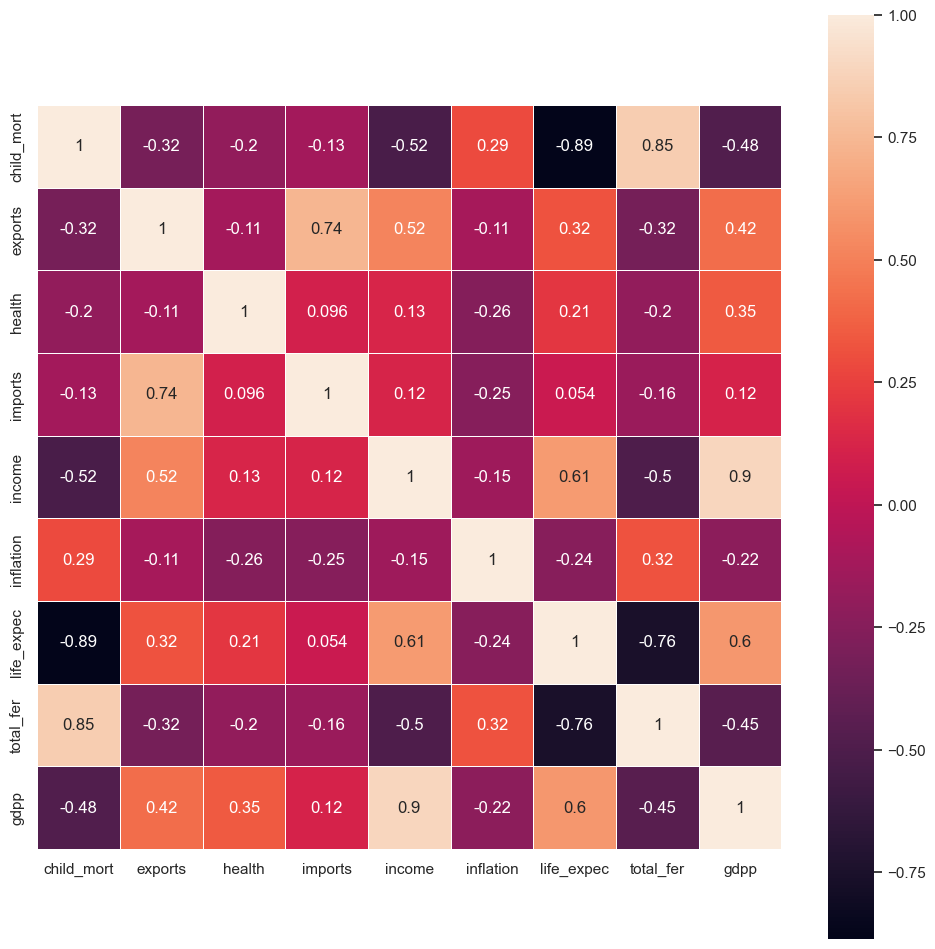

In [ ]:
corr = normalized_data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

## **Etapa 03 - Clusterização**

1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
* K-Médias
* DBScan

Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.


**Definindo o número de clusters**

In [ ]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()

In [ ]:
def plot_cluster_points(df, labels, ax=None, hue="cluster", legend="auto"):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax, legend=legend)

In [ ]:
plot_cluster_points(normalized_data, kmeans.labels_)

    Clientes com silhueta menor ou igual a zero devem ser analisados.

    O processo de mensuração do índice de silhueta basicamente funciona assim:
    - É uma medida normalizada e varia entre -1 e 1, onde:

       *  1 : perfeição
       *  0 : confusão
       * -1 : erro ou associação errada

    A silhueta não é uma boa medida de validação de clusters não convexos.

2. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.



3. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

4. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

    Não, pois ela penaliza os pontos da base de dados baseado na posição dos centróides e é fortemente indicada para bases de dados cujos clusters são convexos, que são alvos do K-Means

## **Etapa 04 - Medidas de similaridade**

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários. 

2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

3. Indique um caso de uso para essa solução projetada.

4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.